In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itables import show
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import timedelta

In [2]:
# Load the sales data (adjust the file path as needed)
sales = pd.read_excel('./furniture.xlsx')
# Convert date columns to datetime
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['ship_date'] = pd.to_datetime(sales['ship_date'])

### 1. Identify seasonal trends by analyzing sales data from previous years and group them by month.

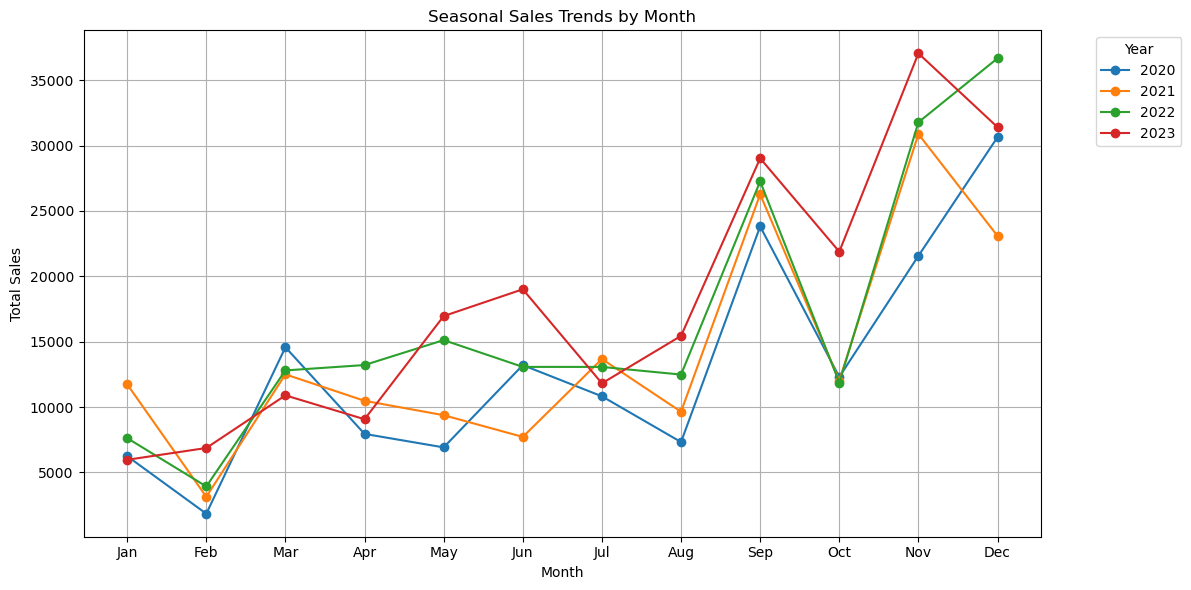

In [4]:
    # Ensure order_date is in datetime format
    sales['order_date'] = pd.to_datetime(sales['order_date'])

    # Extract year and month for grouping
    sales['year'] = sales['order_date'].dt.year
    sales['month'] = sales['order_date'].dt.month

    # Group sales by year and month, summing up total_sales
    monthly_sales = sales.groupby(['year', 'month'])['total_sales'].sum().reset_index()

    # Create a pivot table for visualization
    sales_pivot = monthly_sales.pivot(index='month', columns='year', values='total_sales')

    # Plot the seasonal trends
    sales_pivot.plot(figsize=(12, 6), marker='o')
    plt.title('Seasonal Sales Trends by Month')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()




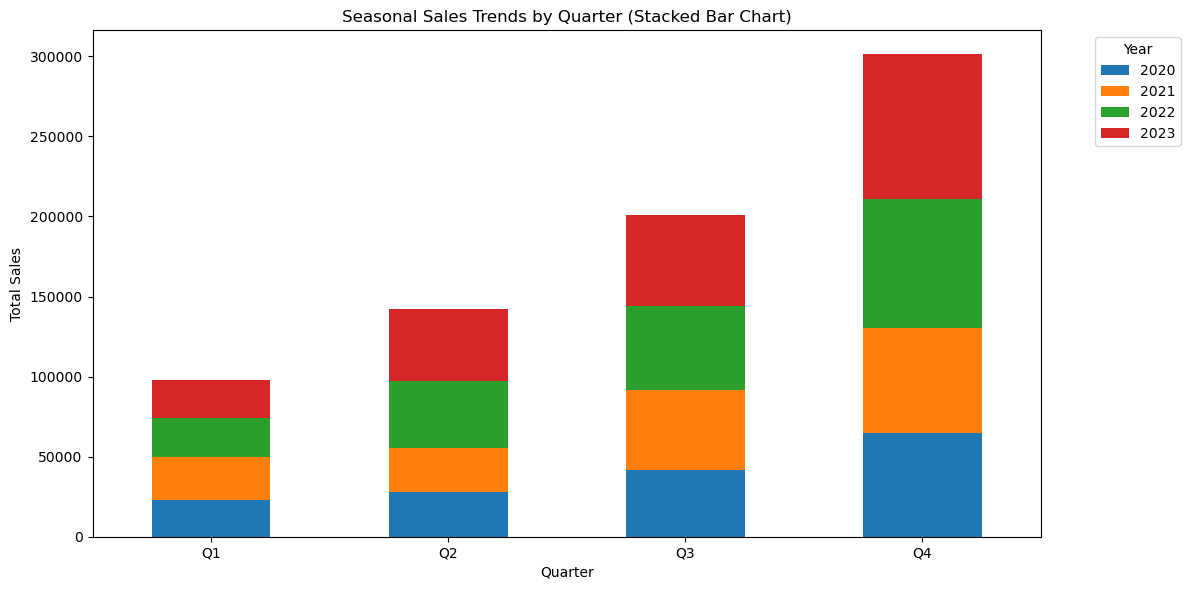

In [8]:
    # Load the Excel file
  #  sales = pd.read_excel(file_path, sheet_name=0, usecols=['order_date', 'total_sales'])

    # Ensure order_date is in datetime format
    sales['order_date'] = pd.to_datetime(sales['order_date'])

    # Extract year and quarter for grouping
    sales['year'] = sales['order_date'].dt.year
    sales['quarter'] = sales['order_date'].dt.quarter

    # Group sales by year and quarter, summing up total_sales
    quarterly_sales = sales.groupby(['year', 'quarter'])['total_sales'].sum().reset_index()

    # Create a pivot table for visualization
    sales_pivot = quarterly_sales.pivot(index='quarter', columns='year', values='total_sales')

    # Plot a stacked bar chart for seasonal trends by quarter
    sales_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Seasonal Sales Trends by Quarter (Stacked Bar Chart)')
    plt.xlabel('Quarter')
    plt.ylabel('Total Sales')
    plt.xticks(ticks=range(4), labels=['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



###  2. Generate a rolling 12-month sales forecast based on historical sales.

C:\Users\Owner\AppData\Local\Temp\ipykernel_17436\3251989201.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales['total_sales'].resample('M').sum()
C:\Users\Owner\miniconda3\envs\furniture_sales\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


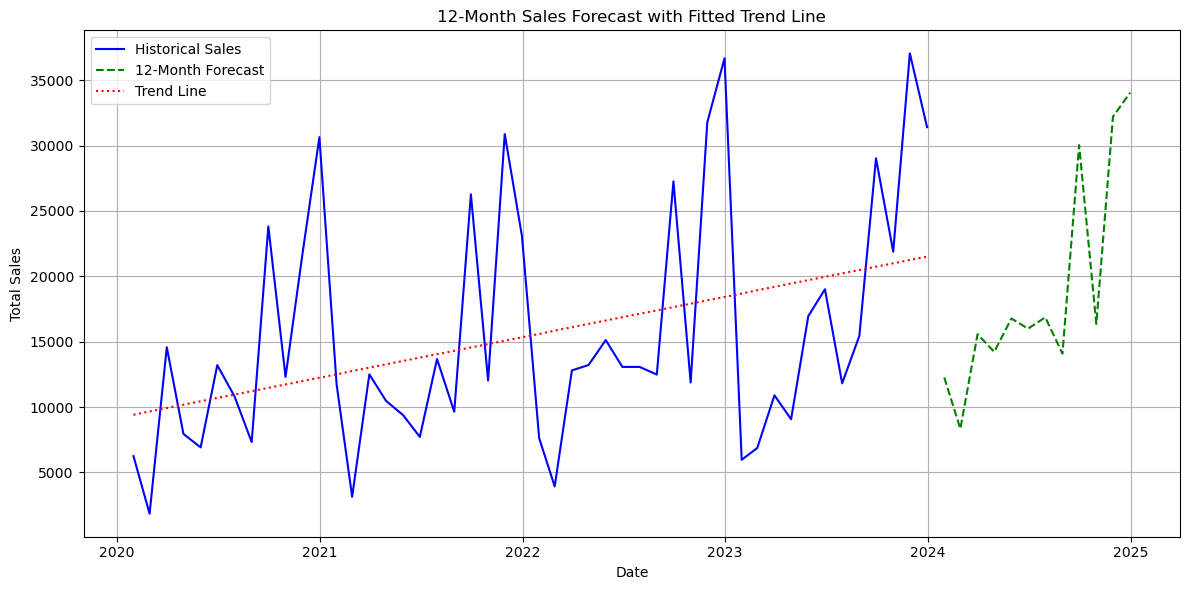

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Load the uploaded Excel file
file_path = 'furniture.xlsx'

# Read the Excel file and select relevant columns
try:
    # Load the Excel file
    sales = pd.read_excel(file_path, sheet_name=0, usecols=['order_date', 'total_sales'])

    # Ensure order_date is in datetime format
    sales['order_date'] = pd.to_datetime(sales['order_date'])

    # Set order_date as the index and sort the data
    sales.set_index('order_date', inplace=True)
    sales.sort_index(inplace=True)

    # Calculate monthly total sales
    monthly_sales = sales['total_sales'].resample('M').sum()

    # Fit an Exponential Smoothing model for forecasting
    model = ExponentialSmoothing(monthly_sales, seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    # Forecast for the next 12 months
    forecast = model_fit.forecast(steps=12)

    # Fit a linear trend line
    x = np.arange(len(monthly_sales))
    trend_coefficients = np.polyfit(x, monthly_sales.values, 1)  # Linear fit (degree=1)
    trend_line = np.polyval(trend_coefficients, x)

    # Plot the historical sales, forecast, and trend line
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales, label='Historical Sales', color='blue')
    plt.plot(forecast, label='12-Month Forecast', color='green', linestyle='--')
    plt.plot(monthly_sales.index, trend_line, label='Trend Line', color='red', linestyle=':')
    plt.title('12-Month Sales Forecast with Fitted Trend Line')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


### 3. Predict which product Sub-categories are likely to see increased Total sales in the upcoming (12) months based  on past trends

Order Date Range: min   2020-01-06
max   2023-12-30
Name: order_date, dtype: datetime64[ns]


C:\Users\Owner\AppData\Local\Temp\ipykernel_12160\1778603565.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['month_num'] = (sub_data['order_month'].dt.to_timestamp() - sub_data['order_month'].min().to_timestamp()).dt.days
C:\Users\Owner\miniconda3\envs\furniture_sales\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Owner\AppData\Local\Temp\ipykernel_12160\1778603565.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

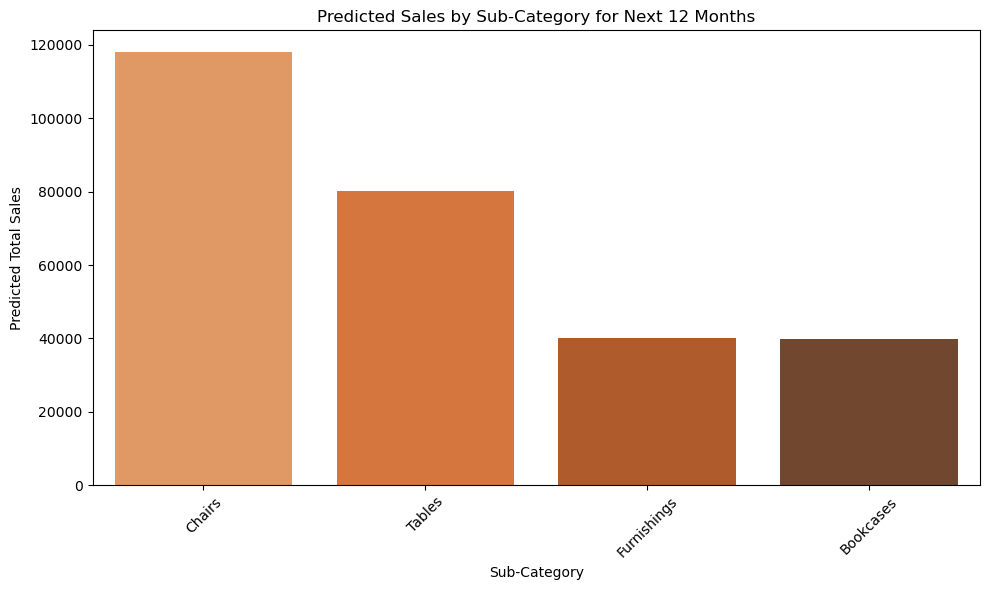

In [4]:
sales['order_month'] = sales['order_date'].dt.to_period('M')
monthly_sales_by_subcategory = sales.groupby(['order_month', 'sub_category'])['total_sales'].sum().reset_index()

# Prepare for prediction
predictions = []
future_months = pd.date_range(start=sales['order_date'].max() + pd.offsets.MonthBegin(1), periods=12, freq='MS')

for sub_category in monthly_sales_by_subcategory['sub_category'].unique():
    sub_data = monthly_sales_by_subcategory[monthly_sales_by_subcategory['sub_category'] == sub_category]
    sub_data['month_num'] = (sub_data['order_month'].dt.to_timestamp() - sub_data['order_month'].min().to_timestamp()).dt.days
    
    model = LinearRegression()
    X = sub_data[['month_num']]
    y = sub_data['total_sales']
    model.fit(X, y)
    
    future_num = [(fm - sub_data['order_month'].min().to_timestamp()).days for fm in future_months]
    future_sales = model.predict(np.array(future_num).reshape(-1, 1))
    predictions.append(pd.DataFrame({'sub_category': sub_category, 'future_month': future_months, 'predicted_sales': future_sales}))

predicted_sales_summary = pd.concat(predictions).groupby('sub_category')['predicted_sales'].sum().reset_index().sort_values(by='predicted_sales', ascending=False)

# Plot predicted sales by sub-category
plt.figure(figsize=(10, 6))
sns.barplot(data=predicted_sales_summary, x='sub_category', y='predicted_sales', palette='Oranges_d')
plt.title("Predicted Sales by Sub-Category for Next 12 Months")
plt.xlabel("Sub-Category")
plt.ylabel("Predicted Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


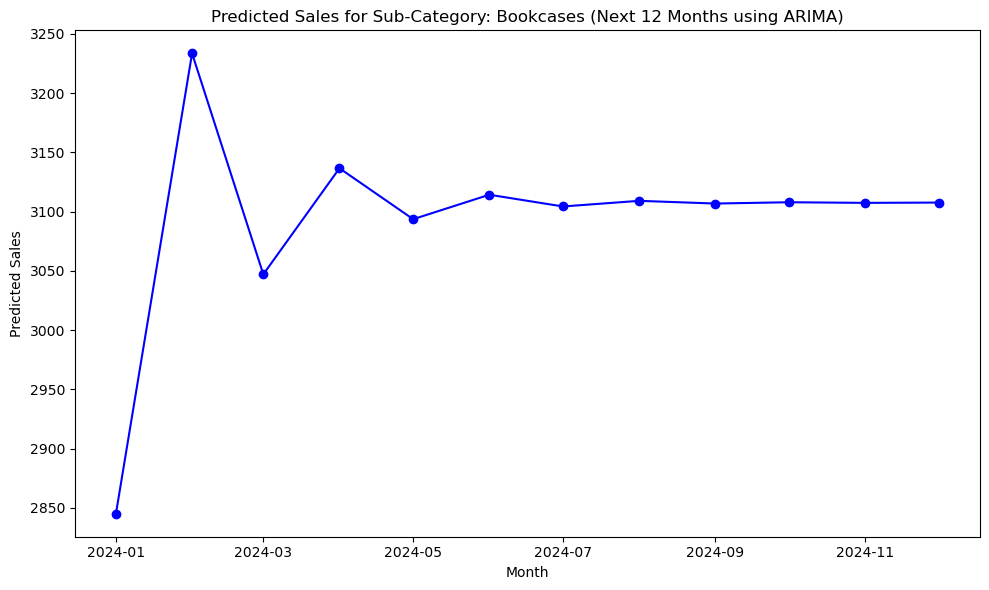

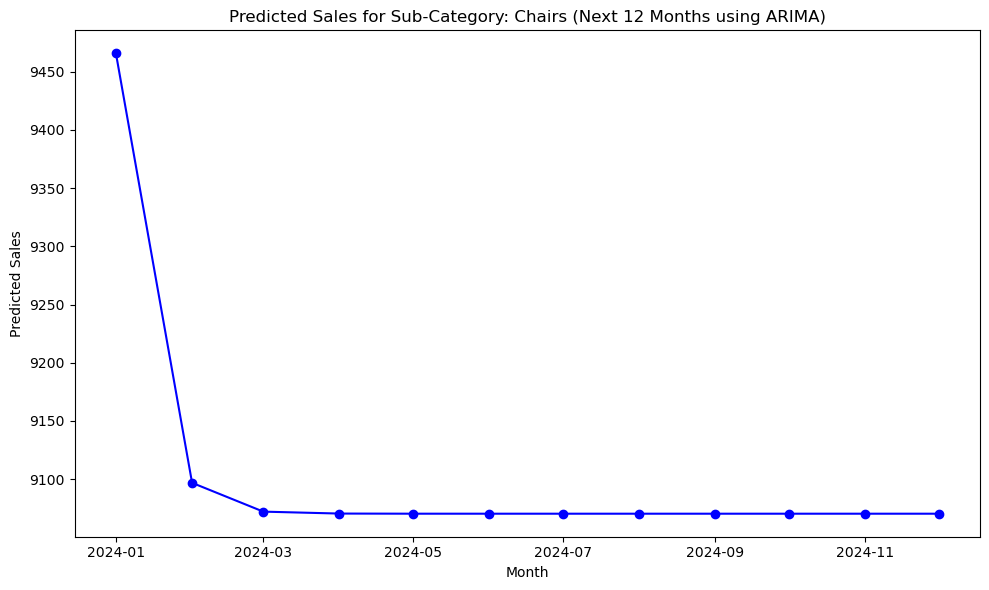

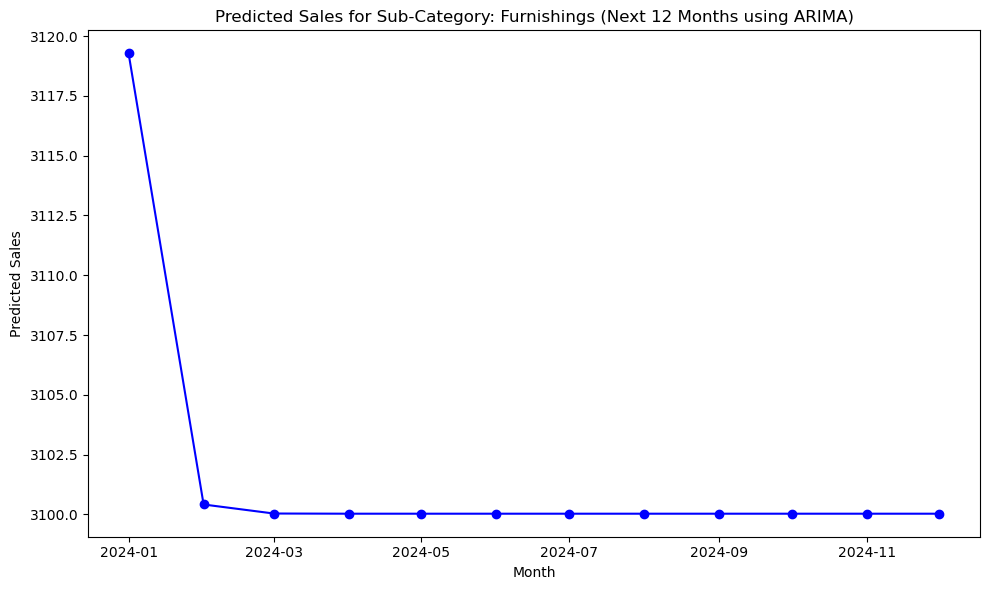

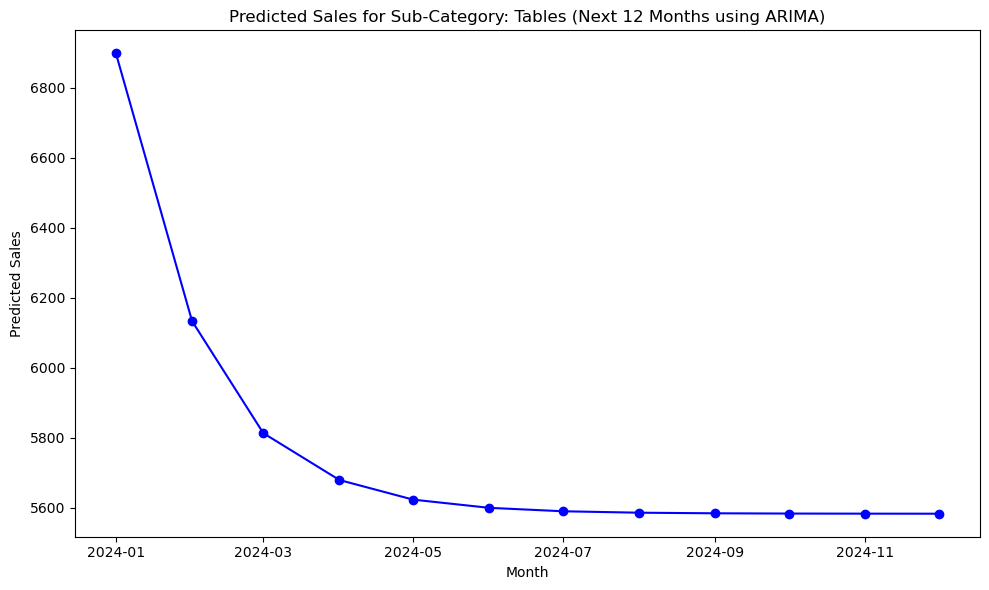

In [8]:
sales['order_month'] = sales['order_date'].dt.to_period('M')
monthly_sales_by_subcategory = sales.groupby(['order_month', 'sub_category'])['total_sales'].sum().reset_index()

# Prepare for prediction
predictions = []
future_months = pd.date_range(start=sales['order_date'].max() + pd.offsets.MonthBegin(1), periods=12, freq='MS')

for sub_category in monthly_sales_by_subcategory['sub_category'].unique():
    sub_data = monthly_sales_by_subcategory[monthly_sales_by_subcategory['sub_category'] == sub_category]
    sub_data.set_index('order_month', inplace=True)
    
    # Fit ARIMA model
    model = ARIMA(sub_data['total_sales'], order=(1, 1, 1))
    model_fit = model.fit()
    
    # Forecast the next 12 months
    forecast = model_fit.forecast(steps=12)
    forecast_df = pd.DataFrame({'sub_category': sub_category, 'future_month': future_months, 'predicted_sales': forecast.values})
    predictions.append(forecast_df)

predicted_sales_all = pd.concat(predictions)

# Plot predicted sales for each sub-category as separate plots
for sub_category in predicted_sales_all['sub_category'].unique():
    plt.figure(figsize=(10, 6))
    sub_data = predicted_sales_all[predicted_sales_all['sub_category'] == sub_category]
    plt.plot(sub_data['future_month'], sub_data['predicted_sales'], marker='o', color='blue')
    plt.title(f"Predicted Sales for Sub-Category: {sub_category} (Next 12 Months using ARIMA)")
    plt.xlabel("Month")
    plt.ylabel("Predicted Sales")
    plt.tight_layout()
    plt.show()

### 4. Create a forecasting report that breaks down future sales expectations by region and market  segment.

     region market_segment  total_predicted_sales
0   Central       Consumer           20733.433211
1   Central      Corporate           18367.194708
2   Central    Home Office            7022.046170
3      East       Consumer           28920.370618
4      East      Corporate           16837.570975
5      East    Home Office           10156.706736
6     South       Consumer           24705.433149
7     South      Corporate            9291.561874
8     South    Home Office            9971.778517
9      West       Consumer           31064.896617
10     West      Corporate           36546.637734
11     West    Home Office           19195.211547


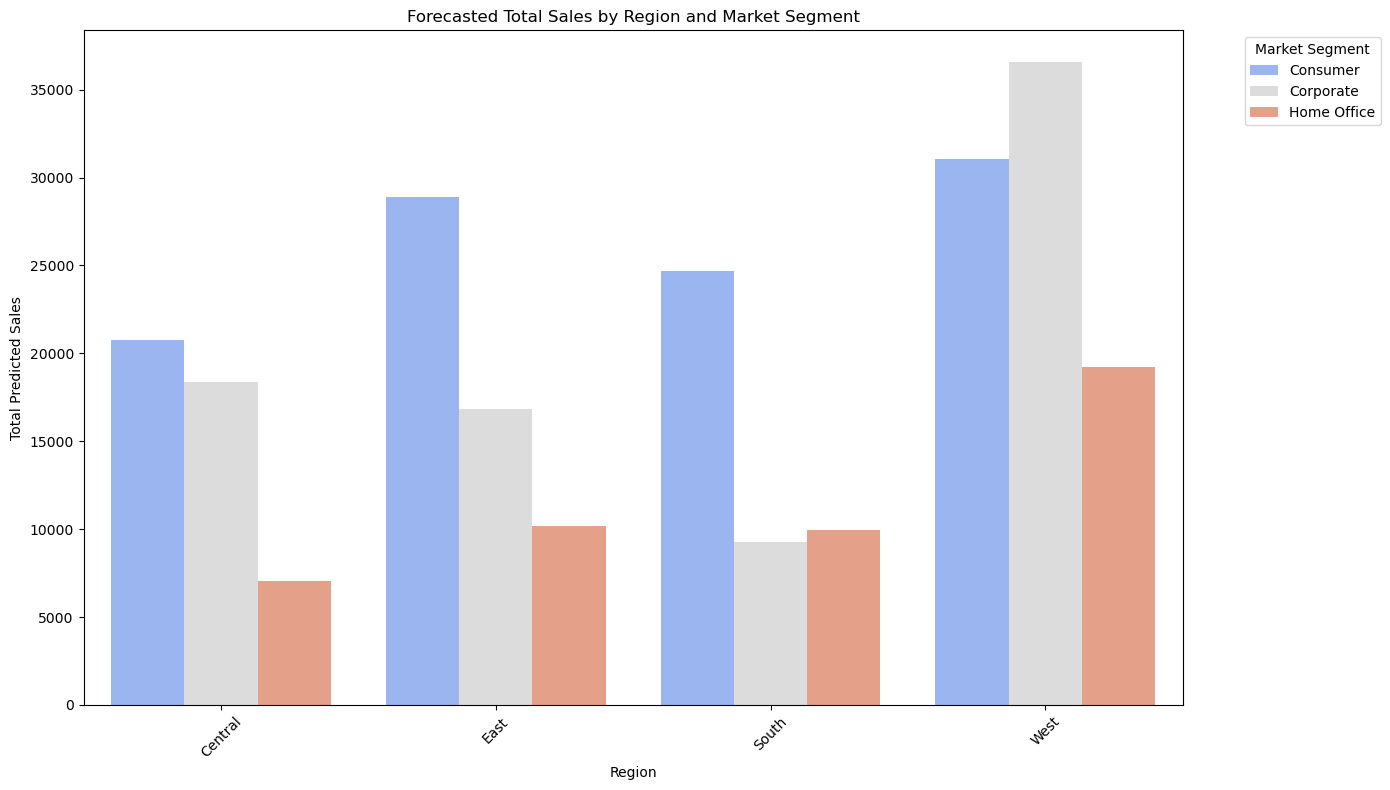

In [9]:
monthly_sales_by_region_segment = sales.groupby(['order_month', 'region', 'market_segment'])['total_sales'].sum().reset_index()

# Prepare for prediction
region_segment_predictions = []

for (region, segment) in monthly_sales_by_region_segment.groupby(['region', 'market_segment']).groups.keys():
    sub_data = monthly_sales_by_region_segment[(monthly_sales_by_region_segment['region'] == region) &
                                               (monthly_sales_by_region_segment['market_segment'] == segment)]
    sub_data.set_index('order_month', inplace=True)
    
    # Fit ARIMA model
    model = ARIMA(sub_data['total_sales'], order=(1, 1, 1))
    model_fit = model.fit()
    
    # Forecast the next 12 months
    forecast = model_fit.forecast(steps=12)
    forecast_df = pd.DataFrame({
        'region': region, 
        'market_segment': segment, 
        'future_month': future_months, 
        'predicted_sales': forecast.values
    })
    region_segment_predictions.append(forecast_df)

region_segment_predictions_all = pd.concat(region_segment_predictions)

# Display the forecasting report
forecasting_report = region_segment_predictions_all.groupby(['region', 'market_segment']).agg(
    total_predicted_sales=('predicted_sales', 'sum')).reset_index()


# Plot future sales expectations by region and market segment
plt.figure(figsize=(14, 8))
sns.barplot(data=forecasting_report, x='region', y='total_predicted_sales', hue='market_segment', palette='coolwarm')
plt.title("Forecasted Total Sales by Region and Market Segment")
plt.xlabel("Region")
plt.ylabel("Total Predicted Sales")
plt.xticks(rotation=45)
plt.legend(title="Market Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###  5. Suggest potential growth strategies for underperforming categories based on past data analysis

In [11]:
category_performance = sales.groupby('sub_category')['total_sales'].sum().reset_index()
average_sales = category_performance['total_sales'].mean()
underperforming_categories = category_performance[category_performance['total_sales'] < average_sales]

print("Underperforming Categories:")
print(underperforming_categories)

# Suggest growth strategies
print("\nGrowth Strategies:")
for _, row in underperforming_categories.iterrows():
    category = row['sub_category']
    print(f"- For '{category}': Consider targeted marketing campaigns, bundling with high-performing categories, offering discounts, and improving online visibility. Additionally, analyze customer feedback to identify and address specific issues.")


Underperforming Categories:
  sub_category  total_sales
0    Bookcases  114879.9963
2  Furnishings   91705.1640

Growth Strategies:
- For 'Bookcases': Consider targeted marketing campaigns, bundling with high-performing categories, offering discounts, and improving online visibility. Additionally, analyze customer feedback to identify and address specific issues.
- For 'Furnishings': Consider targeted marketing campaigns, bundling with high-performing categories, offering discounts, and improving online visibility. Additionally, analyze customer feedback to identify and address specific issues.
